In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

# 1. 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target


In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [8]:
dt = DecisionTreeClassifier()

In [9]:
scores = cross_val_score(estimator=dt, X=X, y=y, cv=5, scoring='accuracy')


In [11]:
print("\n--- 최종 평가 ---")
print(f"평균 정확도: {np.mean(scores):.4f}")
print(f"정확도 표준편차: {np.std(scores):.4f}")


--- 최종 평가 ---
평균 정확도: 0.9667
정확도 표준편차: 0.0365


In [28]:
scores = cross_val_score(dt, X, y, cv=kf)


In [29]:
scores

array([0.98, 0.92, 0.94])

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 2. 데이터를 학습용과 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# 1. 기본 모델 객체 생성
dtree = DecisionTreeClassifier(random_state=42)

# 2. 탐색할 하이퍼파라미터 후보들을 딕셔너리로 정의
# 총 4 * 3 = 12개의 조합을 탐색하게 됩니다.
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

In [32]:
# GridSearchCV 객체 생성 (5-겹 교차검증, 평가지표는 정확도)
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1)

# 그리드 서치 시작 (시간이 다소 소요될 수 있습니다)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [33]:
print("최적 하이퍼파라미터:", grid_search.best_params_)
print(f"최고 교차 검증 정확도: {grid_search.best_score_:.4f}")

최적 하이퍼파라미터: {'max_depth': 4, 'min_samples_split': 2}
최고 교차 검증 정확도: 0.9417


In [34]:
# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(grid_search.cv_results_)

# 분석에 유용한 주요 컬럼만 추출
results_df = results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# 점수가 높은 순으로 정렬하여 출력
print(results_df.sort_values(by='rank_test_score').head())

                                     params  mean_test_score  std_test_score  \
6  {'max_depth': 4, 'min_samples_split': 2}         0.941667        0.056519   
3  {'max_depth': 3, 'min_samples_split': 2}         0.933333        0.056519   
4  {'max_depth': 3, 'min_samples_split': 3}         0.933333        0.056519   
5  {'max_depth': 3, 'min_samples_split': 4}         0.933333        0.056519   
7  {'max_depth': 4, 'min_samples_split': 3}         0.933333        0.056519   

   rank_test_score  
6                1  
3                2  
4                2  
5                2  
7                2  


In [35]:
# 최적의 모델을 best_estimator_ 속성으로 바로 사용 가능
best_model = grid_search.best_estimator_

# 테스트 데이터로 예측 수행
y_pred = best_model.predict(X_test)

# 최종 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 세트에서의 최종 정확도: {accuracy:.4f}")

테스트 세트에서의 최종 정확도: 1.0000


In [36]:
dt = DecisionTreeClassifier(max_depth= 4, min_samples_split= 2)

In [37]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
dt.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [40]:
dt.feature_importances_

array([0.        , 0.        , 0.40975699, 0.59024301])

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드 및 분할 (스케일링 불필요)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42, stratify=cancer.target
)

In [42]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
# 3. 특성 중요도 확인 및 시각화
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1] # 중요도 순으로 정렬

In [54]:
np.sort(importances)[::-1][:10].sum()

np.float64(0.818485541280657)

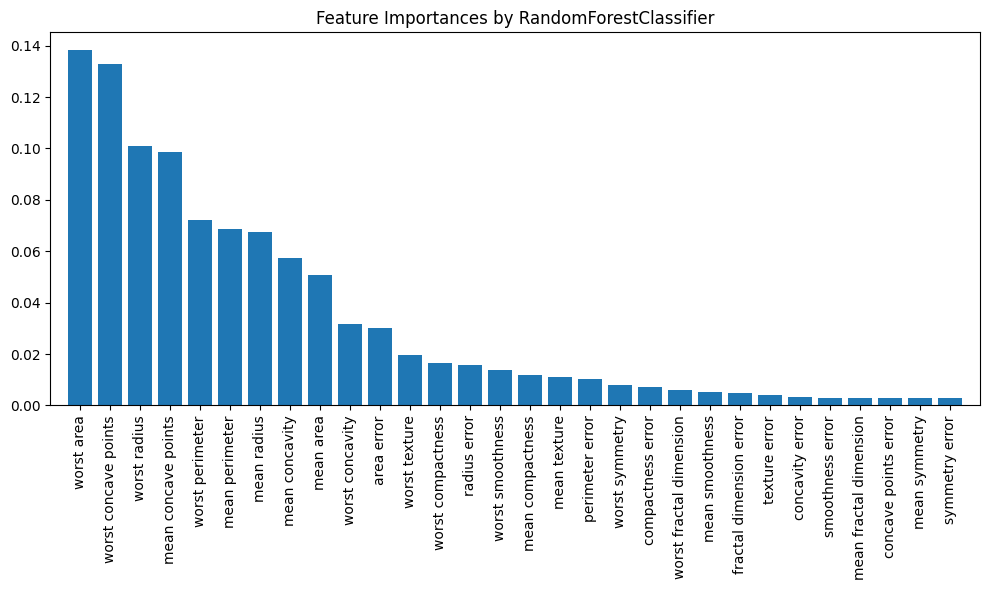

In [44]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by RandomForestClassifier")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), cancer.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout(); plt.show()

In [55]:
# 4. 예측 및 평가
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=cancer.target_names)

print("\n--- RandomForestClassifier 평가 ---")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


--- RandomForestClassifier 평가 ---
Accuracy: 0.9561
Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [56]:
from sklearn.datasets import fetch_california_housing
# (다른 import는 위와 동일)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로드 및 분할
housing = fetch_california_housing()
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)

# 2. RandomForestRegressor 모델 생성 및 학습
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10) # 예시 파라미터
rf_reg.fit(X_train_h, y_train_h)

# 3. 예측 및 평가
y_pred_h = rf_reg.predict(X_test_h)
mse = mean_squared_error(y_test_h, y_pred_h)
r2 = r2_score(y_test_h, y_pred_h) # 또는 rf_reg.score(X_test_h, y_test_h)

print("\n--- RandomForestRegressor 평가 ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


--- RandomForestRegressor 평가 ---
Mean Squared Error (MSE): 0.2965
R-squared (R2): 0.7737


In [57]:
pip install xgboost 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 26.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 8.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.
